In [120]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [121]:
df_1=pd.read_csv("/content/tmdb_genres.csv")
df_2=pd.read_csv("/content/tmdb_movies.csv")

In [122]:
df_1

,Unnamed: 0,genres
0,28.0,Action
1,12.0,Adventure
2,14.0,Fantasy
3,16.0,Animation
4,878.0,Science Fiction
5,18.0,Drama
6,53.0,Thriller
7,10751.0,Family
8,35.0,Comedy
9,36.0,History


In [123]:
df_1.rename(columns={"Unnamed: 0":"genre_id"}, inplace=True)
df_1

,genre_id,genres
0,28.0,Action
1,12.0,Adventure
2,14.0,Fantasy
3,16.0,Animation
4,878.0,Science Fiction
5,18.0,Drama
6,53.0,Thriller
7,10751.0,Family
8,35.0,Comedy
9,36.0,History


In [124]:
df_2

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,NaN,9367,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,1992-09-04,2040920,81.0,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,28.0
4799,4799,9000,NaN,72766,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,2011-12-26,0,85.0,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,35.0
4800,4800,0,http://www.hallmarkchannel.com/signedsealeddel...,231617,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,2013-10-13,0,120.0,Released,NaN,"Signed, Sealed, Delivered",7.0,6,35.0
4801,4801,0,http://shanghaicalling.com/,126186,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,2012-05-03,0,98.0,Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,NaN


Zad 1

In [125]:
df_2.describe()

,Unnamed: 0,budget,id,popularity,revenue,runtime,vote_average,vote_count,genre_id
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4775.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989,634.411309
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891,2415.010323
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,12.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000,18.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,28.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000,35.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,10770.000000


In [126]:
df_2_z1=(df_2[df_2["vote_count"]>737]).sort_values(by="vote_average", ascending=False)
df_2_z1[0:11]

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
1881,1881,25000000,NaN,278,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,1994-09-23,28341469,142.0,Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,18.0
3337,3337,6000000,http://www.thegodfather.com/,238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,1972-03-14,245066411,175.0,Released,An offer you can't refuse.,The Godfather,8.4,5893,18.0
2294,2294,15000000,http://movies.disney.com/spirited-away,129,ja,千と千尋の神隠し,A ten year old girl who wanders away from her ...,118.968562,2001-07-20,274925095,125.0,Released,The tunnel led Chihiro to a mysterious town...,Spirited Away,8.3,3840,14.0
3865,3865,3300000,http://sonyclassics.com/whiplash/,244786,en,Whiplash,"Under the direction of a ruthless instructor, ...",192.528841,2014-10-10,13092000,105.0,Released,The road to greatness can take you to the edge.,Whiplash,8.3,4254,18.0
2731,2731,13000000,NaN,240,en,The Godfather: Part II,In the continuing saga of the Corleone crime f...,105.792936,1974-12-20,47542841,200.0,Released,"I don't feel I have to wipe everybody out, Tom...",The Godfather: Part II,8.3,3338,18.0
3232,3232,8000000,NaN,680,en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,1994-10-08,213928762,154.0,Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,53.0
1818,1818,22000000,http://www.schindlerslist.com/,424,en,Schindler's List,The true story of how businessman Oskar Schind...,104.469351,1993-11-29,321365567,195.0,Released,"Whoever saves one life, saves the world entire.",Schindler's List,8.3,4329,18.0
662,662,63000000,http://www.foxmovies.com/movies/fight-club,550,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,1999-10-15,100853753,139.0,Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,18.0
2170,2170,806948,NaN,539,en,Psycho,When larcenous real estate clerk Marion Crane ...,93.067866,1960-06-16,32000000,109.0,Released,The master of suspense moves his cameras into ...,Psycho,8.2,2320,18.0
1847,1847,25000000,http://www.warnerbros.com/goodfellas,769,en,GoodFellas,"The true story of Henry Hill, a half-Irish, ha...",63.654244,1990-09-12,46836394,145.0,Released,Three Decades of Life in the Mafia.,GoodFellas,8.2,3128,18.0


Zad 2

In [127]:
df_2["release_date"] = pd.to_datetime(df_2["release_date"])

In [128]:
df_2["release_year"]=df_2["release_date"].dt.year
df_2

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,release_year
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0,2009.0
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0,2007.0
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,2015.0
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0,2012.0
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,NaN,9367,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,1992-09-04,2040920,81.0,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,28.0,1992.0
4799,4799,9000,NaN,72766,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,2011-12-26,0,85.0,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,35.0,2011.0
4800,4800,0,http://www.hallmarkchannel.com/signedsealeddel...,231617,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,2013-10-13,0,120.0,Released,NaN,"Signed, Sealed, Delivered",7.0,6,35.0,2013.0
4801,4801,0,http://shanghaicalling.com/,126186,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,2012-05-03,0,98.0,Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,NaN,2012.0


In [129]:
print(df_2.isnull().sum())

Unnamed: 0              0
budget                  0
homepage             3091
id                      0
original_language       0
original_title          0
overview                3
popularity              0
release_date            1
revenue                 0
runtime                 2
status                  0
tagline               844
title                   0
vote_average            0
vote_count              0
genre_id               28
release_year            1
dtype: int64


In [130]:
df_2_copy=df_2[(df_2["release_year"]>=2010)&(df_2["release_year"]<=2016)] 
print(df_2_copy.isnull().sum())

Unnamed: 0             0
budget                 0
homepage             614
id                     0
original_language      0
original_title         0
overview               3
popularity             0
release_date           0
revenue                0
runtime                2
status                 0
tagline              286
title                  0
vote_average           0
vote_count             0
genre_id              17
release_year           0
dtype: int64


In [131]:
df_2_chart=(df_2_copy.groupby(pd.Grouper(key='release_year')).agg({'revenue':'mean','budget':'mean'})).sort_values(by="release_year", ascending=False)
df_2_chart

,revenue,budget
release_year,,
2016.0,1.390496e+08,4.570327e+07
2015.0,1.054399e+08,3.113216e+07
2014.0,1.013466e+08,3.095989e+07
2013.0,1.013485e+08,3.552329e+07
2012.0,1.160659e+08,3.492203e+07
2011.0,9.200413e+07,3.477232e+07
2010.0,9.043811e+07,3.449541e+07


Text(0.5, 1.0, 'Średni przychód i budżet filmu w latach 2010-2016')

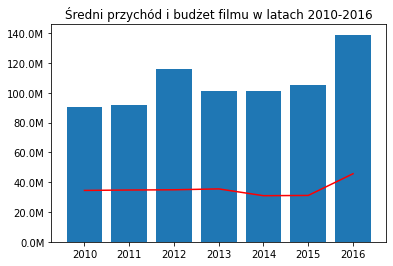

In [132]:
def million(x, pos):
        return '{:2.1f}M'.format(x*1e-6)
fig, ax = plt.subplots()
df_2_chart.reset_index(inplace=True)
x = df_2_chart["release_year"]
y1 = df_2_chart["revenue"]
y2 = df_2_chart["budget"]
formatter = plt.FuncFormatter(million)
ax.yaxis.set_major_formatter(formatter)
plt.bar(x,y1)
plt.plot(x,y2,color="red")
plt.title('Średni przychód i budżet filmu w latach 2010-2016')

Zad 3

In [133]:
merged_df=df_2.merge(df_1,how='left', on="genre_id")
merged_df

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,release_year,genres
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0,2009.0,Action
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0,2007.0,Adventure
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,2015.0,Action
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0,2012.0,Action
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0,2012.0,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,NaN,9367,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,1992-09-04,2040920,81.0,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,28.0,1992.0,Action
4799,4799,9000,NaN,72766,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,2011-12-26,0,85.0,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,35.0,2011.0,Comedy
4800,4800,0,http://www.hallmarkchannel.com/signedsealeddel...,231617,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,2013-10-13,0,120.0,Released,NaN,"Signed, Sealed, Delivered",7.0,6,35.0,2013.0,Comedy
4801,4801,0,http://shanghaicalling.com/,126186,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,2012-05-03,0,98.0,Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,NaN,2012.0,NaN


Zad 4

In [134]:
df_pivot=(merged_df.pivot_table(values='id',index='genres',aggfunc=len)).sort_values(by='id', ascending=False)
df_pivot

,id
genres,
Drama,1207
Comedy,1042
Action,754
Adventure,339
Horror,300
Crime,195
Thriller,194
Animation,123
Fantasy,117


Najczęściej pojawiają się filmy gatunku "Drama" - jest ich 1207

Zad 5

In [135]:
df_pivot_2=(merged_df.pivot_table(values='runtime',index='genres',aggfunc=np.mean)).sort_values(by='runtime', ascending=False)
df_pivot_2

,runtime
genres,
History,133.960000
War,126.125000
Western,117.925926
Drama,115.521559
Adventure,113.061947
Crime,112.143590
TV Movie,110.500000
Action,109.058355
Science Fiction,109.031250


Średnio najdłużej trwają filmy gatunku History

Zad 6

<Axes: >

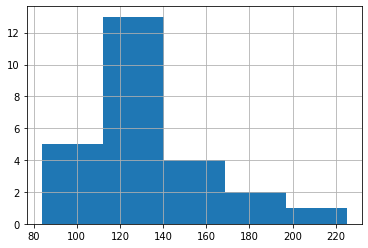

In [142]:
history_chart_df=merged_df[merged_df['genres']=="History"]
history_chart_df['runtime'].hist(bins=5)